#### 1. Load the dataset and explore the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
customer_churn = pd.read_csv('customer_churn.csv')

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
customer_churn['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [6]:
customer_churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
customer_churn['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [8]:
customer_churn['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [9]:
list(customer_churn.columns.values)
# our columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

#### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

In [10]:
customer_churn2= customer_churn[['Churn','tenure','SeniorCitizen','MonthlyCharges']]

In [11]:
customer_churn2

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [12]:
customer_churn2.dtypes

Churn              object
tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

#### 3. Extract the target variable.

In [13]:
# X/y split, outcome is the target
X = customer_churn2.drop('Churn',axis = 1)
y = customer_churn2['Churn']

#### 4. Extract the independent variables and scale them.

In [14]:
customer_churn2.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default fraction is .2

In [16]:
# all features are numeric, so no need to split into _num and _cat

transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

In [17]:
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [18]:
# y train has different index than the x-train scaled.
# train_test_split(X, y, random_state=0) # default fraction is .2

y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [19]:
X_train.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,24,0,49.30
6397,54,1,65.25
6043,3,0,40.15
5309,61,0,20.25
3000,12,0,84.45


In [20]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# THE ORDER IS NOT CHANGED, ONLY THE INDEX IS RESET

# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 
y_train.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [21]:
y_test

0       No
1       No
2       No
3       No
4       No
        ..
1756    No
1757    No
1758    No
1759    No
1760    No
Name: Churn, Length: 1761, dtype: object

#### 5. Build the logistic regression model.

In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [23]:
LR.predict_proba(X_train_scaled)
# if we have a model we can start making predictions but with a new function, predict_proba
# the 2nd column gives the probability that my target equals 1
# those are the predicted Y values

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

<AxesSubplot:>

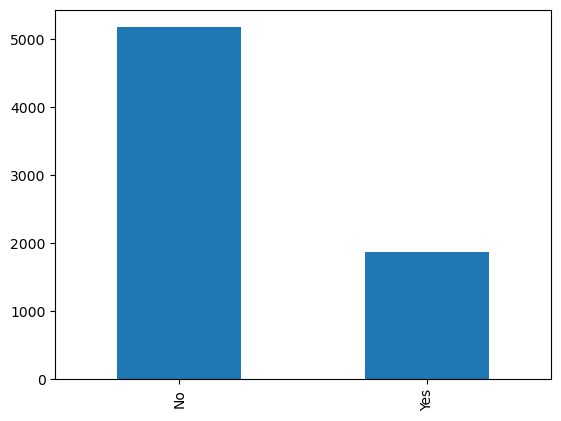

In [24]:
count_classes = customer_churn2['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [25]:
5174/(5174+1869)

0.7346301292063041

In [26]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

# score on data it hasn't seen yet. It scores 78%
# worst case model would be getting the most frequent, diagnose everything 0, so it is 73%

0.7808063600227144

#### 6. Evaluate the model.

Score on data it hasn't seen yet. It scores 78%
Worst case model, which is picking the most frequent outcome (NO), would be getting 73,4%

In [38]:
print("precision: ",precision_score(y_test,pred,pos_label="Yes")) #first the actuals then the predictions
print("recall: ",recall_score(y_test,pred,pos_label="Yes"))
print("f1: ",f1_score(y_test,pred,pos_label="Yes"))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


#### 7. Even a simple model will give us more than 70% accuracy. Why?

There is a big imbalance in the data. From all the samples we gathered, 73% are No, and only 27% are Yes, so the model is highly biased

#### 8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [29]:
X_train_SMOTE.shape

(7752, 3)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [31]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)
pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [32]:
y_train_SMOTE.value_counts()


No     3876
Yes    3876
Name: Churn, dtype: int64

In [33]:
y_train

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5277     No
5278     No
5279     No
5280    Yes
5281     No
Name: Churn, Length: 5282, dtype: object

In [37]:

print("precision: ",precision_score(y_test,pred,pos_label="Yes")) #first the actuals then the predictions
print("recall: ",recall_score(y_test,pred,pos_label="Yes"))
print("f1: ",f1_score(y_test,pred,pos_label="Yes"))


precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035
